=> Take home project for an Uber Data sciencist position. 
Dataset contains two weeks of hour by hour information on drivers and riders

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# PROJECT UBER : INSIGHTS FROM CITY SUPPPLY AND DEMAND DATA

## Cleaning

In [2]:
df = pd.read_csv('dataset_1.csv')
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [3]:
print('df')
print(df.isna().sum()/len(df), '\n')

df
Date                0.955357
Time (Local)        0.000000
Eyeballs            0.000000
Zeroes              0.000000
Completed Trips     0.000000
Requests            0.000000
Unique Drivers      0.000000
dtype: float64 



In [9]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\yacin\AppData\Local\Temp\ipykernel_9176\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [58]:
df.head(18)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,2012-09-10,7,5,0,2,2,9
1,NaT,8,6,0,2,2,14
2,NaT,9,8,3,0,0,14
3,NaT,10,9,2,0,1,14
4,NaT,11,11,1,4,4,11
5,NaT,12,12,0,2,2,11
6,NaT,13,9,1,0,0,9
7,NaT,14,12,1,0,0,9
8,NaT,15,11,2,1,2,7
9,NaT,16,11,2,3,4,6


first day : 0 to 16 included (17h)
next day : 17 to 40 included (full day i.e 24h)

In [57]:
date_col = df[['Date']][18:].reset_index(drop=True)
l = []
i = 1
for k in range(len(date_col.Date)):
    if pd.isna(date_col.Date[k]):
        i+=1
    else:
        l.append(i)
        i=1
l

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]

=> 13 days and 17 hours of data

Complete the date column

In [61]:
df.Date[1:17] = df.Date[0]
df.head(18)

C:\Users\yacin\AppData\Local\Temp\ipykernel_9176\838697329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date[1:17] = df.Date[0]


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,2012-09-10,7,5,0,2,2,9
1,2012-09-10,8,6,0,2,2,14
2,2012-09-10,9,8,3,0,0,14
3,2012-09-10,10,9,2,0,1,14
4,2012-09-10,11,11,1,4,4,11
5,2012-09-10,12,12,0,2,2,11
6,2012-09-10,13,9,1,0,0,9
7,2012-09-10,14,12,1,0,0,9
8,2012-09-10,15,11,2,1,2,7
9,2012-09-10,16,11,2,3,4,6


In [65]:
day = df.Date[17]
for k in range(len(df.Date[18:])):
    if pd.isna(df.Date[k]):
        df.Date[k] = day
    else:
        day = df.Date[k]

df[17:44]

C:\Users\yacin\AppData\Local\Temp\ipykernel_9176\2489252720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date[k] = day
C:\Users\yacin\AppData\Local\Temp\ipykernel_9176\2489252720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date[k] = day
C:\Users\yacin\AppData\Local\Temp\ipykernel_9176\2489252720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date[k] = day
C:\Users\yacin\AppData\Local\Temp\ipykernel_9176\248

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
17,2012-09-11,0,9,3,1,1,3
18,2012-09-11,1,3,2,0,1,3
19,2012-09-11,2,1,1,0,0,1
20,2012-09-11,3,1,1,0,0,1
21,2012-09-11,4,1,1,0,0,1
22,2012-09-11,5,1,1,0,0,0
23,2012-09-11,6,7,3,2,3,3
24,2012-09-11,7,10,0,2,2,5
25,2012-09-11,8,11,2,0,0,6
26,2012-09-11,9,15,2,0,0,6


In [77]:
df[317:]

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
317,2012-09-23,12,25,3,2,4,8
318,2012-09-23,13,15,4,3,3,9
319,2012-09-23,14,20,2,4,4,7
320,2012-09-23,15,22,4,0,2,9
321,2012-09-23,16,22,0,7,8,11
322,2012-09-23,17,31,9,4,6,12
323,2012-09-23,18,36,4,8,11,12
324,2012-09-23,19,32,9,4,6,11
325,2012-09-23,20,29,6,3,3,7
326,2012-09-23,21,24,6,3,4,5


In [76]:
df.Date[318:329] = df.Date[317]
df.Date[330:] = df.Date[329]

C:\Users\yacin\AppData\Local\Temp\ipykernel_9176\3192504594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date[318:329] = df.Date[317]
C:\Users\yacin\AppData\Local\Temp\ipykernel_9176\3192504594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date[330:] = df.Date[329]


In [78]:
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,2012-09-10,7,5,0,2,2,9
1,2012-09-10,8,6,0,2,2,14
2,2012-09-10,9,8,3,0,0,14
3,2012-09-10,10,9,2,0,1,14
4,2012-09-10,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0
332,2012-09-24,3,3,3,0,1,0
333,2012-09-24,4,1,1,0,0,0
334,2012-09-24,5,4,2,1,1,3


In [84]:
df['Cancelled Trips'] = df['Requests '] - df['Completed Trips ']
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Cancelled Trips
0,2012-09-10,7,5,0,2,2,9,0
1,2012-09-10,8,6,0,2,2,14,0
2,2012-09-10,9,8,3,0,0,14,0
3,2012-09-10,10,9,2,0,1,14,1
4,2012-09-10,11,11,1,4,4,11,0
...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,2
332,2012-09-24,3,3,3,0,1,0,1
333,2012-09-24,4,1,1,0,0,0,0
334,2012-09-24,5,4,2,1,1,3,0


In [93]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers', 'Cancelled Trips'],
      dtype='object')

In [94]:
df = df.rename(columns={'Date': 'date', 'Time (Local)': 'time', 'Eyeballs ': 'eyeballs', 'Zeroes ': 'zeroes', 'Completed Trips ': 'completed_trips', 'Requests ': 'requests', 'Unique Drivers': 'unique_drivers', 'Cancelled Trips': 'cancelled_trips'})

### 1. Which date had the most completed trips during the two week period?

In [108]:
df['completed_trips'].idxmax()

280

In [109]:
df.loc[[280]]

,date,time,eyeballs,zeroes,completed_trips,requests,unique_drivers,cancelled_trips,24_hour_sum
280,2012-09-21,23,94,30,36,46,26,10,190.0


=> 21 September at 23h had 36 completed trips, max in the two weeks

If looking for a day:

In [210]:
agg_date = df.groupby('date')['completed_trips'].sum()
agg_date

date
2012-09-10     26
2012-09-11     40
2012-09-12     91
2012-09-13     45
2012-09-14    108
2012-09-15    199
2012-09-16     93
2012-09-17     57
2012-09-18     42
2012-09-19     41
2012-09-20     70
2012-09-21    190
2012-09-22    248
2012-09-23    111
2012-09-24      4
Name: completed_trips, dtype: int64

2012-09-22 was max with 248 completed trips

### 2. What was the highest number of completed trips within a 24 hour period?

In [95]:
df['24_hour_sum'] = df['completed_trips'].rolling(window=24).sum()
max_completed_trips_24_hours = df['24_hour_sum'].max()

In [107]:
max_index = df['24_hour_sum'].idxmax()
df.iloc[[max_index]]

,date,time,eyeballs,zeroes,completed_trips,requests,unique_drivers,cancelled_trips,24_hour_sum
297,2012-09-22,16,58,17,15,18,16,3,278.0


In [97]:
max_completed_trips_24_hours

278.0

=> From 21 sept 17h to 22 sept 17h, 278 trips were completed

### 3. Which hour of the day had the most requests during the two week period?

In [120]:
ans = df.groupby('time')['requests'].mean().reset_index().sort_values('requests', ascending=False)
ans

,time,requests
23,23,13.142857
22,22,12.428571
19,19,11.142857
0,0,10.142857
18,18,8.500000
21,21,8.000000
20,20,7.642857
2,2,7.142857
17,17,7.000000
1,1,6.857143


<Axes: xlabel='time', ylabel='requests'>

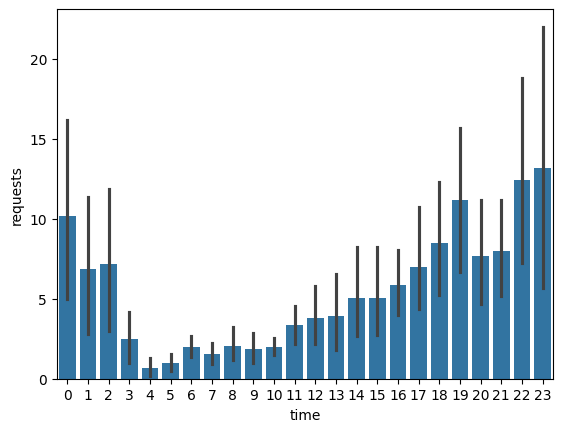

In [131]:
sns.barplot(x='time', y='requests', data=df)

=> 23h hast the most requests, with an average of 13

### 4. What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)

In [133]:
df['day_name'] = df['date'].dt.day_name()
df

,date,time,eyeballs,zeroes,completed_trips,requests,unique_drivers,cancelled_trips,24_hour_sum,day_name
0,2012-09-10,7,5,0,2,2,9,0,NaN,Monday
1,2012-09-10,8,6,0,2,2,14,0,NaN,Monday
2,2012-09-10,9,8,3,0,0,14,0,NaN,Monday
3,2012-09-10,10,9,2,0,1,14,1,NaN,Monday
4,2012-09-10,11,11,1,4,4,11,0,NaN,Monday
...,...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,2,61.0,Monday
332,2012-09-24,3,3,3,0,1,0,1,52.0,Monday
333,2012-09-24,4,1,1,0,0,0,0,52.0,Monday
334,2012-09-24,5,4,2,1,1,3,0,53.0,Monday


In [138]:
def we_function(row):
    if row['day_name'] == 'Friday':
        if row['time'] >= 17:
            return True
        else:
            return False

    elif row['day_name'] == 'Saturday':
        return True

    elif row['day_name'] == 'Sunday':
        if row['time'] < 3:
            return True
        else:
            return False

    else:
        return False

In [139]:
df['weekend'] = df.apply(we_function, axis=1)
df

,date,time,eyeballs,zeroes,completed_trips,requests,unique_drivers,cancelled_trips,24_hour_sum,day_name,weekend
0,2012-09-10,7,5,0,2,2,9,0,NaN,Monday,False
1,2012-09-10,8,6,0,2,2,14,0,NaN,Monday,False
2,2012-09-10,9,8,3,0,0,14,0,NaN,Monday,False
3,2012-09-10,10,9,2,0,1,14,1,NaN,Monday,False
4,2012-09-10,11,11,1,4,4,11,0,NaN,Monday,False
...,...,...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,2,61.0,Monday,False
332,2012-09-24,3,3,3,0,1,0,1,52.0,Monday,False
333,2012-09-24,4,1,1,0,0,0,0,52.0,Monday,False
334,2012-09-24,5,4,2,1,1,3,0,53.0,Monday,False


In [142]:
we_zeroes = df.groupby('weekend')['zeroes'].sum().reset_index()
we_zeroes

,weekend,zeroes
0,False,788
1,True,641


In [144]:
we_zeroes_percentage = (641*100)/(641 + 788)
we_zeroes_percentage

44.856543037088876

=> 45% of all zeroes during weekend

### 5. What is the weighted average ratio of completed trips per driver during the two week period? "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.

Method : 

Multiply each hourly ratio by its corresponding weight (total trips in that hour).

Sum up all these weighted values.

Divide this sum by the total number of trips across all hours to get the weighted average.

In [164]:
df['ratio'] = np.where(df['unique_drivers'] != 0, df['completed_trips'] / df['unique_drivers'], np.nan)
df['weighted_ratio'] = df['ratio'] * df['completed_trips']
w_avg = df['weighted_ratio'].sum() / df['completed_trips'].sum()
w_avg

0.8276707747535554

=> 0.83 completed trips per driver

### 6. In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

In [185]:
df['unique_requests'] = np.where(df['unique_drivers'] != 0, df['requests'] / df['unique_drivers'], np.nan)
df['8_hour_sum_2'] = df['unique_requests'].rolling(window=8).sum()
shifts2 = df.groupby('time')['8_hour_sum_2'].mean().reset_index().sort_values('8_hour_sum_2', ascending=False)
shifts2

,time,8_hour_sum_2
5,5,11.044963
2,2,8.627093
4,4,8.438765
3,3,8.158186
1,1,7.968888
0,0,7.288548
23,23,6.594678
22,22,5.637957
21,21,5.051485
20,20,4.826167


=> Busiest shift is from 22h to 6h

### 7. True or False: Driver supply always increases when demand increases during the two week period.

In [186]:
df

,date,time,eyeballs,zeroes,completed_trips,requests,unique_drivers,cancelled_trips,24_hour_sum,day_name,weekend,ratio,weighted_ratio,unique_requests,8_hour_sum_2,ratio_z_e,72_ratio
0,2012-09-10,7,5,0,2,2,9,0,NaN,Monday,False,0.222222,0.444444,0.222222,NaN,0.000000,NaN
1,2012-09-10,8,6,0,2,2,14,0,NaN,Monday,False,0.142857,0.285714,0.142857,NaN,0.000000,NaN
2,2012-09-10,9,8,3,0,0,14,0,NaN,Monday,False,0.000000,0.000000,0.000000,NaN,0.375000,NaN
3,2012-09-10,10,9,2,0,1,14,1,NaN,Monday,False,0.000000,0.000000,0.071429,NaN,0.222222,NaN
4,2012-09-10,11,11,1,4,4,11,0,NaN,Monday,False,0.363636,1.454545,0.363636,NaN,0.090909,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,2,61.0,Monday,False,NaN,NaN,NaN,NaN,1.000000,NaN
332,2012-09-24,3,3,3,0,1,0,1,52.0,Monday,False,NaN,NaN,NaN,NaN,1.000000,NaN
333,2012-09-24,4,1,1,0,0,0,0,52.0,Monday,False,NaN,NaN,NaN,NaN,1.000000,0.295813
334,2012-09-24,5,4,2,1,1,3,0,53.0,Monday,False,0.333333,0.333333,0.333333,NaN,0.500000,0.288868


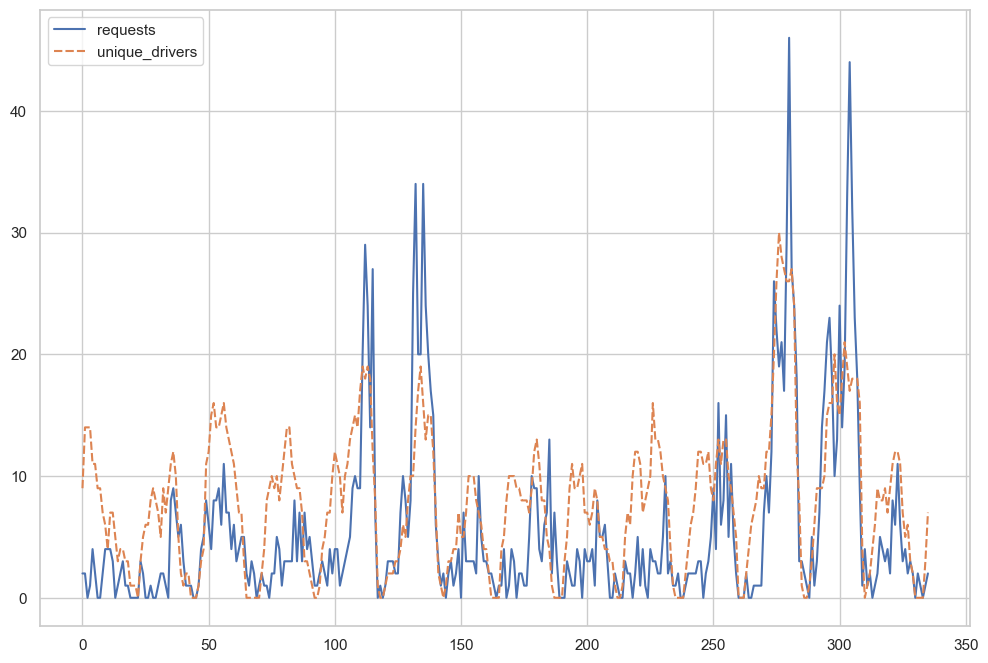

In [211]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df[['requests', 'unique_drivers', 'date']])
plt.show()

<Axes: xlabel='requests', ylabel='unique_drivers'>

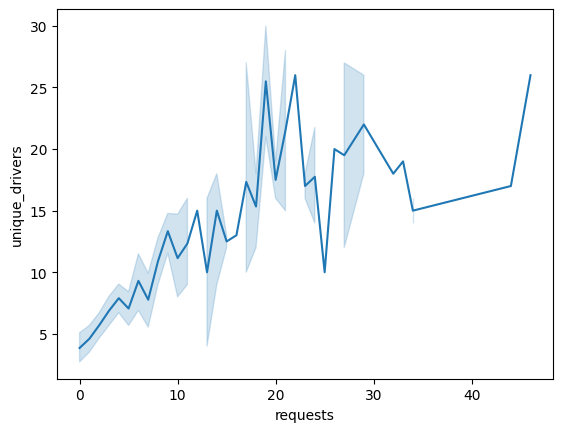

In [175]:
sns.lineplot(x='requests', y='unique_drivers', data=df)

=> False : past 20 requests, driver supply either decreases or cannot follow the demand

### 8. In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

In [178]:
(df['eyeballs'] == 0).any()

True

In [179]:
df['ratio_z_e'] = np.where(df['eyeballs'] != 0, df['zeroes'] / df['eyeballs'], np.nan)
df

,date,time,eyeballs,zeroes,completed_trips,requests,unique_drivers,cancelled_trips,24_hour_sum,day_name,weekend,ratio,weighted_ratio,unique_requests,8_hour_sum_2,ratio_z_e
0,2012-09-10,7,5,0,2,2,9,0,NaN,Monday,False,0.222222,0.444444,0.222222,NaN,0.000000
1,2012-09-10,8,6,0,2,2,14,0,NaN,Monday,False,0.142857,0.285714,0.142857,NaN,0.000000
2,2012-09-10,9,8,3,0,0,14,0,NaN,Monday,False,0.000000,0.000000,0.000000,NaN,0.375000
3,2012-09-10,10,9,2,0,1,14,1,NaN,Monday,False,0.000000,0.000000,0.071429,NaN,0.222222
4,2012-09-10,11,11,1,4,4,11,0,NaN,Monday,False,0.363636,1.454545,0.363636,NaN,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,2,61.0,Monday,False,NaN,NaN,inf,NaN,1.000000
332,2012-09-24,3,3,3,0,1,0,1,52.0,Monday,False,NaN,NaN,inf,NaN,1.000000
333,2012-09-24,4,1,1,0,0,0,0,52.0,Monday,False,NaN,NaN,NaN,NaN,1.000000
334,2012-09-24,5,4,2,1,1,3,0,53.0,Monday,False,0.333333,0.333333,0.333333,NaN,0.500000


In [180]:
df['72_ratio'] = df['ratio_z_e'].rolling(window=72).mean()
df['72_ratio'].max()

0.37407685095522936

In [182]:
max_72_index = df['72_ratio'].idxmax()
df.iloc[[max_72_index]]

,date,time,eyeballs,zeroes,completed_trips,requests,unique_drivers,cancelled_trips,24_hour_sum,day_name,weekend,ratio,weighted_ratio,unique_requests,8_hour_sum_2,ratio_z_e,72_ratio
189,2012-09-18,4,1,1,0,0,0,0,62.0,Tuesday,False,NaN,NaN,NaN,NaN,1.0,0.374077


=> Ratio is the highest (0.37) from 09-15 5h to 09-18 5h

### 9. If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? Consider both rider eyeballs and driver supply when choosing

In [189]:
df['eyeball_driver'] = df['eyeballs'] - df['unique_drivers']

,date,time,eyeballs,zeroes,completed_trips,requests,unique_drivers,cancelled_trips,24_hour_sum,day_name,weekend,ratio,weighted_ratio,unique_requests,8_hour_sum_2,ratio_z_e,72_ratio,eyeball_driver
0,2012-09-10,7,5,0,2,2,9,0,NaN,Monday,False,0.222222,0.444444,0.222222,NaN,0.000000,NaN,-4
1,2012-09-10,8,6,0,2,2,14,0,NaN,Monday,False,0.142857,0.285714,0.142857,NaN,0.000000,NaN,-8
2,2012-09-10,9,8,3,0,0,14,0,NaN,Monday,False,0.000000,0.000000,0.000000,NaN,0.375000,NaN,-6
3,2012-09-10,10,9,2,0,1,14,1,NaN,Monday,False,0.000000,0.000000,0.071429,NaN,0.222222,NaN,-5
4,2012-09-10,11,11,1,4,4,11,0,NaN,Monday,False,0.363636,1.454545,0.363636,NaN,0.090909,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,2,61.0,Monday,False,NaN,NaN,NaN,NaN,1.000000,NaN,3
332,2012-09-24,3,3,3,0,1,0,1,52.0,Monday,False,NaN,NaN,NaN,NaN,1.000000,NaN,3
333,2012-09-24,4,1,1,0,0,0,0,52.0,Monday,False,NaN,NaN,NaN,NaN,1.000000,0.295813,1
334,2012-09-24,5,4,2,1,1,3,0,53.0,Monday,False,0.333333,0.333333,0.333333,NaN,0.500000,0.288868,1


In [190]:
solu = df.groupby('time')['eyeball_driver'].mean().reset_index().sort_values('eyeball_driver', ascending=False)
solu

,time,eyeball_driver
23,23,26.357143
22,22,24.857143
21,21,21.714286
18,18,19.500000
19,19,19.142857
20,20,17.642857
17,17,17.357143
0,0,16.285714
16,16,15.285714
14,14,14.785714


=> At 23h is when there's the most demand and the fewer drivers

### 10. True or False: There is exactly two weeks of data in this analysis

False, 13 days and 17 hours as seen previously

### 11. Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums).

define 'true end day' : hour when eyeballs AND unique_drivers are the lowest 

In [193]:
df['low_activity'] = df['eyeballs'] + df['unique_drivers']
df

,date,time,eyeballs,zeroes,completed_trips,requests,unique_drivers,cancelled_trips,24_hour_sum,day_name,weekend,ratio,weighted_ratio,unique_requests,8_hour_sum_2,ratio_z_e,72_ratio,eyeball_driver,low_activity
0,2012-09-10,7,5,0,2,2,9,0,NaN,Monday,False,0.222222,0.444444,0.222222,NaN,0.000000,NaN,-4,14
1,2012-09-10,8,6,0,2,2,14,0,NaN,Monday,False,0.142857,0.285714,0.142857,NaN,0.000000,NaN,-8,20
2,2012-09-10,9,8,3,0,0,14,0,NaN,Monday,False,0.000000,0.000000,0.000000,NaN,0.375000,NaN,-6,22
3,2012-09-10,10,9,2,0,1,14,1,NaN,Monday,False,0.000000,0.000000,0.071429,NaN,0.222222,NaN,-5,23
4,2012-09-10,11,11,1,4,4,11,0,NaN,Monday,False,0.363636,1.454545,0.363636,NaN,0.090909,NaN,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,2,61.0,Monday,False,NaN,NaN,NaN,NaN,1.000000,NaN,3,3
332,2012-09-24,3,3,3,0,1,0,1,52.0,Monday,False,NaN,NaN,NaN,NaN,1.000000,NaN,3,3
333,2012-09-24,4,1,1,0,0,0,0,52.0,Monday,False,NaN,NaN,NaN,NaN,1.000000,0.295813,1,1
334,2012-09-24,5,4,2,1,1,3,0,53.0,Monday,False,0.333333,0.333333,0.333333,NaN,0.500000,0.288868,1,7


In [194]:
activ = df.groupby('time')['low_activity'].mean().reset_index().sort_values('low_activity')
activ

,time,low_activity
4,4,2.714286
5,5,3.785714
6,6,8.214286
3,3,8.785714
7,7,12.214286
2,2,16.571429
8,8,17.571429
1,1,21.500000
9,9,22.285714
10,10,26.571429


=> 4h is the lowest activity time, we can consider it a true 'End Day'

In [197]:
visu = df.groupby('time')[['eyeballs','unique_drivers']].mean()
visu

,eyeballs,unique_drivers
time,,
0,24.214286,7.928571
1,14.785714,6.714286
2,12.142857,4.428571
3,5.928571,2.857143
4,2.071429,0.642857
5,3.000000,0.785714
6,5.571429,2.642857
7,7.928571,4.285714
8,10.785714,6.785714


In [203]:
visu_tidy = visu.melt(id_vars = 'time')
visu_tidy

,time,variable,value
0,0,eyeballs,24.214286
1,1,eyeballs,14.785714
2,2,eyeballs,12.142857
3,3,eyeballs,5.928571
4,4,eyeballs,2.071429
5,5,eyeballs,3.000000
6,6,eyeballs,5.571429
7,7,eyeballs,7.928571
8,8,eyeballs,10.785714
9,9,eyeballs,14.428571


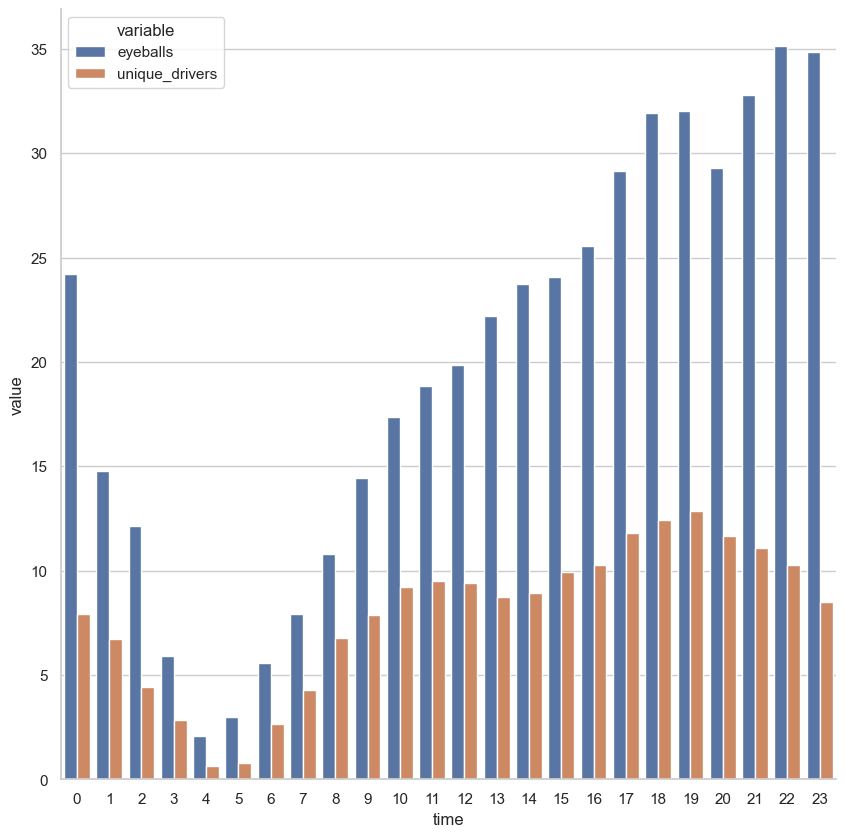

In [205]:
fig, ax1 = plt.subplots(figsize=(10, 10))
sns.set_theme(style="whitegrid")
sns.barplot(x='time', y='value', hue='variable', data=visu_tidy, ax=ax1)
sns.despine(fig)

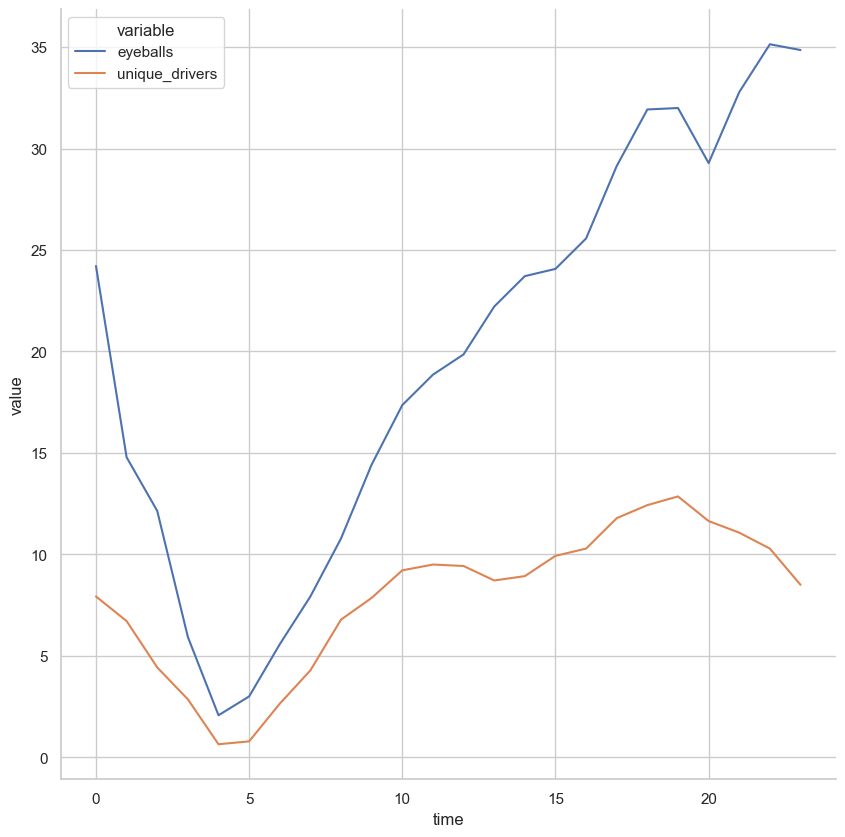

In [212]:
fig, ax1 = plt.subplots(figsize=(10, 10))
sns.set_theme(style="whitegrid")
sns.lineplot(x='time', y='value', hue='variable', data=visu_tidy, ax=ax1)
sns.despine(fig)

=> Same conclusion with visualisation